<h1>Hypothesis</h1>
<h3>City's AQI index can be affected by GDP or  Country GDP Ranking</h3>

<h3>Read GDP ranking by country</h3>

In [67]:
# Read AQI Data, calculate average AQI in a week
# Read Population Data, Area Data, Make density 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [68]:
df_merge= pd.read_csv('../data/Merge_static.csv')
df_merge = df_merge[['City','Country','Population','GDP']]
df_merge


,City,Country,Population,GDP
0,Tokyo,Japan,37339804,1790.000
1,Delhi,India,31181376,210.000
2,Shanghai,China,27795702,608.000
3,Sao Paulo,Brazil,22237472,408.938
4,Mexico City,Mexico,21918936,293.259
...,...,...,...,...
1165,Kolwezi,DR Congo,501375,NaN
1166,Kabinda,DR Congo,501054,NaN
1167,Jianyang,China,500925,NaN
1168,Douai-Lens,France,500921,NaN


In [69]:
df_country = pd.read_csv('../get_gdp/country_gdp.csv')
df_country.sort_values(by=['gdpPerCapita'],ascending=False,inplace=True)
df_countryGDP = df_country.reset_index()

l = [i for i in range(1,212)]
# print(l)
df_countryGDP['gdp_rank'] = pd.DataFrame(l)
df_countryGDP = df_countryGDP[['country','gdpPerCapita','gdp_rank']]


In [70]:
print(df_countryGDP)


           country  gdpPerCapita  gdp_rank
0           Monaco   163701.2700         1
1    Liechtenstein   161926.2103         2
2       Luxembourg   116085.9716         3
3          Bermuda    98684.8285         4
4            Macau    94408.5153         5
..             ...           ...       ...
206     Madagascar      476.3726       207
207          Niger      422.9071       208
208         Malawi      400.0980       209
209        Burundi      303.0493       210
210    South Sudan      245.6645       211

[211 rows x 3 columns]


In [71]:
import pandasql as ps
sql = 'SELECT df_merge.*, df_countryGDP.gdpPerCapita,df_countryGDP.gdp_rank  from df_merge,df_countryGDP WHERE df_merge.Country = df_countryGDP.country'
df_gdp = ps.sqldf(sql,locals())
df_gdp

,City,Country,Population,GDP,gdpPerCapita,gdp_rank
0,Tokyo,Japan,37339804,1790.000,43596.8659,29
1,Delhi,India,31181376,210.000,2337.9495,159
2,Shanghai,China,27795702,608.000,10710.3777,86
3,Sao Paulo,Brazil,22237472,408.938,9638.1461,89
4,Mexico City,Mexico,21918936,293.259,9962.5973,88
...,...,...,...,...,...,...
1165,Kolwezi,DR Congo,501375,NaN,568.0465,201
1166,Kabinda,DR Congo,501054,NaN,568.0465,201
1167,Jianyang,China,500925,NaN,10710.3777,86
1168,Douai-Lens,France,500921,NaN,43958.7034,28


<h3>Read AQI Data and Calculate Average,Max,Min AQI</h3>

In [72]:
# Read AQ
def average_AQI(file=''):
    df = pd.read_csv(file)
    df = df[['city','AQI']]
    df_result = df.groupby('city').mean()
    df_result.columns = ['avg_AQI']
    return df_result
# Read AQ
def max_AQI(file=''):
    df = pd.read_csv(file)
    df = df[['city','AQI']]
    df_result = df.groupby('city').max()
    df_result.columns = ['max_AQI']
    return df_result

def min_AQI(file=''):
    df = pd.read_csv(file)
    df = df[['city','AQI']]
    df_result = df.groupby('city').min()
    df_result.columns = ['min_AQI']
    return df_result
df_avg_aqi = average_AQI('../ProcessedAQI/Final/aqi.csv')
df_max_aqi = max_AQI('../ProcessedAQI/Final/aqi.csv')
df_min_aqi = min_AQI('../ProcessedAQI/Final/aqi.csv')
df = pd.merge(df_avg_aqi, df_max_aqi, on="city")
df = pd.merge(df, df_min_aqi, on="city")
df_aqi = pd.DataFrame(df)
df_aqi

,avg_AQI,max_AQI,min_AQI
city,,,
Abeokuta,71.500000,91.0,36.0
Abidjan,64.583333,96.0,51.0
Abu Dhabi,84.512658,132.0,53.0
Abuja,88.750000,126.0,68.0
Acapulco de Juarez,70.546053,167.0,36.0
...,...,...,...
Zhaoqing,94.105263,131.0,55.0
Zhengzhou,166.096386,263.0,106.0
Zhenjiang Jiangsu,163.550633,192.0,130.0


In [73]:
import pandasql as ps
sql2 = 'SELECT * From df_aqi JOIN df_gdp ON df_aqi.city = df_gdp.City'
df_result = ps.sqldf(sql2,locals())

In [74]:
df_result = df_result.drop_duplicates()
df_result = df_result[['city','avg_AQI','max_AQI','min_AQI','GDP','Country','gdp_rank','gdpPerCapita']]

In [75]:
print(df_result)
print(df_result.dtypes)

            city     avg_AQI  max_AQI  min_AQI       GDP        Country  \
0          Tokyo   59.913043    126.0     24.0  1790.000          Japan   
1          Delhi  205.879518    329.0     63.0   210.000          India   
2       Shanghai  113.939759    212.0     56.0   608.000          China   
3      Sao Paulo   72.716867    212.0     54.0   408.938         Brazil   
4    Mexico City  121.436364    222.0     54.0   293.259         Mexico   
..           ...         ...      ...      ...       ...            ...   
712       Arusha   87.200000     98.0     66.0       NaN       Tanzania   
713       Murcia   31.592308     81.0     14.0       NaN          Spain   
714       Tirana   40.335821     87.0     15.0       NaN        Albania   
715  Surat Thani   87.400000    154.0     30.0       NaN       Thailand   
716  Kansas City   55.637037    115.0     23.0   132.703  United States   

     gdp_rank  gdpPerCapita  
0          29    43596.8659  
1         159     2337.9495  
2        

In [76]:
minvalue_series = df_result.min(skipna = False)
maxvalue_series = df_result.max(skipna = False)
print(minvalue_series)
print(maxvalue_series)

city               Abeokuta
avg_AQI                21.3
max_AQI                26.0
min_AQI                 2.0
GDP                     NaN
Country         Afghanistan
gdp_rank                  5
gdpPerCapita       303.0493
dtype: object
city                Zurich
avg_AQI         222.118012
max_AQI              500.0
min_AQI              181.0
GDP                    NaN
Country           Zimbabwe
gdp_rank               210
gdpPerCapita    94408.5153
dtype: object


<h3>Draw barchart according to Level of AQI  and GDP rank by Country</h3>
<p>
    - Green:  0-50  <br/>
    - Yellow:  51-100 <br/>
    - Orange:  101-150 <br/>
    - Red:     151-200 <br/>
    - Purple:   201-300 <br/>
    - Maroon:   301 - Higher
</p>

In [77]:
def get_barchart_statistic(cmap:list):
    d={}

    d1 = {x:int(cmap.count(x)) for x in cmap}
    for key in d1.keys():
        d[key] = d1[key]
    # print(d)
    return d

def plot_hist(input='',df_re=None):
    df_result = df_re.copy()
    df_green = df_result[df_result[input].between(1,50)]
    df_yellow = df_result[df_result[input].between(51,100)]
    df_orange = df_result[df_result[input].between(101,151)]
    df_red = df_result[df_result[input].between(151,200)]
    df_purple = df_result[df_result[input].between(201,300)]
    df_maroon = df_result[df_result[input]>300]
    fig = plt.figure(figsize = (20,10))

    #### Subplot 1###

    plt.subplot(2,3,1)
    #Add titles to the chart and axes
    plt.title('Green')
    plt.xlabel('GDP rank')
    x = df_green['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    # x = list(d1.keys())
    # y = list(d1.values())
    plt.hist(d1.keys(),bins=50)
    # plt.plot(x,y)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')

    #### Subplot 2###

    plt.subplot(2,3,2)
    #Add titles to the chart and axes
    plt.title('Yellow')
    plt.xlabel('GDP rank')
    x = df_yellow['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    plt.hist(d1.keys(),bins=50)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')

    #### Subplot 3###

    plt.subplot(2,3,3)
    #Add titles to the chart and axes
    plt.title('Orange')
    plt.xlabel('GDP rank')
    x = df_orange['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    plt.hist(d1.keys(),bins=50)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')

    #### Subplot 4###

    plt.subplot(2,3,4)
    #Add titles to the chart and axes
    plt.title('Red')
    plt.xlabel('GDP rank')
    x = df_red['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    plt.hist(d1.keys(),bins=50)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')


    #### Subplot 5###

    plt.subplot(2,3,5)
    #Add titles to the chart and axes
    plt.title('Purple')
    plt.xlabel('GDP rank')
    x = df_purple['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    plt.hist(d1.keys(),bins=50)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')

    #### Subplot 6###

    plt.subplot(2,3,6)
    #Add titles to the chart and axes
    plt.title('Maroon')
    plt.xlabel('GDP rank')
    x = df_maroon['gdp_rank'].tolist()
    d1 = get_barchart_statistic(x)
    plt.hist(d1.keys(),bins=50)
    plt.xticks(np.arange(0, 212, 20))
    plt.yticks(np.arange(0, 10, 1))
    plt.ylabel('Number of cities')

    plt.plot()



  


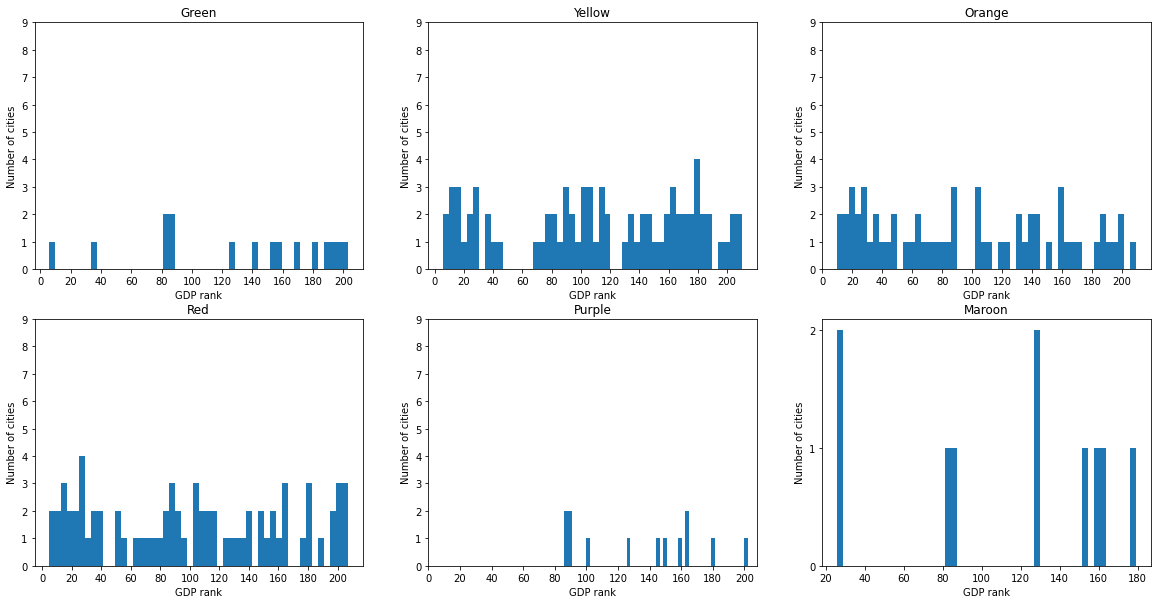

In [78]:
plot_hist('max_AQI',df_re=df_result)

<p>Đối với chỉ số max_AQI (chỉ số AQI cao nhất trong tuần của từng thành phố)<br/>
    - vùng Yellow, Orange, Red: Tập trung nhiều thành phố, Phân bố đều theo GDP ranking <br/>
    - vùng Green:  chiếm số lượng nhỏ, phan bố rải rác ở các ranking dưới 80,  tập chung nhiều hơn ở GDP ranking >120 <br/>
    - vùng Purple: chiếm số lượng nhỏ, tập chung từ GDP ranking >80 <br/>
    - Vùng Maroon: chiếm số lượng rất ít, chỉ có ở 1 số nước. <br/>
</p> 

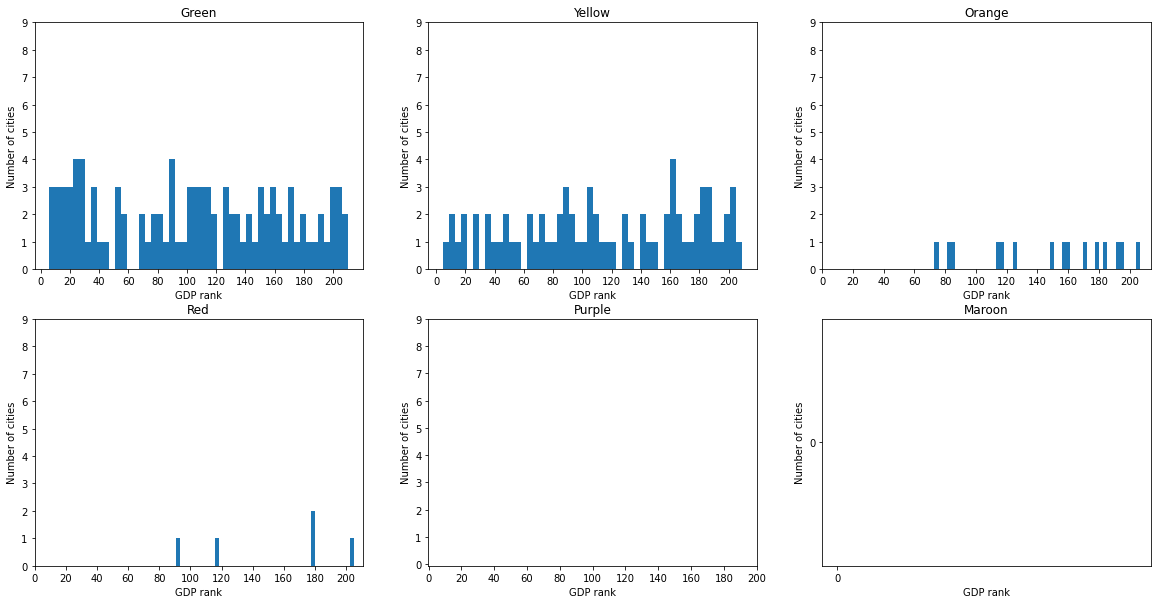

In [79]:
plot_hist('min_AQI',df_re=df_result)

<p>Đối với chỉ số min_AQI (chỉ số AQI thấp nhất trong tuần của từng thành phố)<br/>
    - vùng Green,Yellow: Tập trung nhiều thành phố, Phân bố đều theo GDP ranking <br/>
    - vùng Orange:  chiếm số lượng nhỏ, phan bố rtập chung từ GDP ranking > 80  <br/>
    - vùng Red: chiếm số lượng rất nhỏ, tập chung từ GDP ranking >80 <br/>
    - Vùng Maroon,Purple: Không có <br/>
</p> 

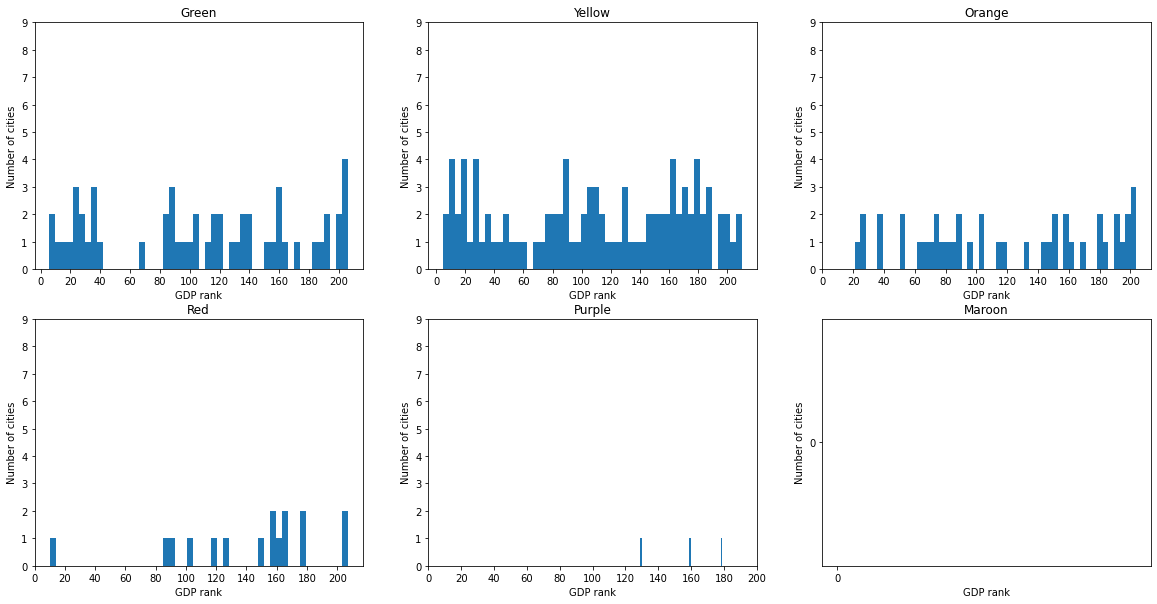

In [80]:
plot_hist('avg_AQI',df_re=df_result)

<p>Đối với chỉ số avg_AQI (chỉ số AQI trung bình trong tuần của từng thành phố)<br/>
    - vùng Green,Yellow, Orange: Tập trung nhiều thành phố, Phân bố đều theo GDP ranking <br/>
    - vùng Red:  chiếm số lượng nhỏ, phan bố rtập chung từ GDP ranking > 80, Chỉ có 1 thành phố có GDP ranking < 20  <br/>
    - vùng Purple: chiếm số lượng rất nhỏ, tập chung từ GDP ranking >80 <br/>
    - Vùng Maroon: Không có <br/>
</p> 

<h2>Kết luận</h2>
<p>
- Với các thành phố ở các quốc gia có GDP ranking thấp (>80),chúng có khả năng có chỉ số AQI xấu hơn so với các nước ranking cao hơn (< 80)
</p>

<h3>Pearson Correlation between GDP and AQI</h3>

In [81]:
# df1 = df_result['avg_AQI','max_AQI','min_AQI','GDP']
# df1
df_result
df1 = df_result[['avg_AQI','min_AQI','max_AQI','GDP']]
df1 = df1.dropna()
df1

,avg_AQI,min_AQI,max_AQI,GDP
0,59.913043,24.0,126.0,1790.000
1,205.879518,63.0,329.0,210.000
2,113.939759,56.0,212.0,608.000
3,72.716867,54.0,212.0,408.938
4,121.436364,54.0,222.0,293.259
...,...,...,...,...
681,78.829630,50.0,114.0,23.000
683,45.238806,18.0,83.0,51.500
684,79.210526,22.0,128.0,47.408
696,71.796992,29.0,152.0,422.189


In [82]:
a = df1.corr(method='pearson')
a

,avg_AQI,min_AQI,max_AQI,GDP
avg_AQI,1.000000,0.743244,0.738744,-0.063107
min_AQI,0.743244,1.000000,0.444721,-0.043053
max_AQI,0.738744,0.444721,1.000000,-0.026658
GDP,-0.063107,-0.043053,-0.026658,1.000000


<p>GDP của thành phố không ảnh hưởng đến AQI index, do các chỉ số Pearson < 0 </p>